In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

from math import sqrt, floor
from random import randint

%matplotlib inline
sns.set(style="ticks")

In [2]:
def compute_CP(level):
    base_stamina = 80
    base_attack = 85
    base_defense = 76
    
    total_cp_multiplier = 0.095 * sqrt(level*2)
    
    stamina = (base_stamina + randint(0,15)) * total_cp_multiplier
    attack = (base_attack + randint(0,15)) * total_cp_multiplier
    defense = (base_defense + randint(0,15)) * total_cp_multiplier
    
    cp = max(10, floor(sqrt(stamina) * attack * sqrt(defense) / 10))
    return cp

In [13]:
cp_all = []
n_random_mon = 10000
for level in range(1, 20+1):
    for i in range(n_random_mon):
        cp_all.append(compute_CP(level))

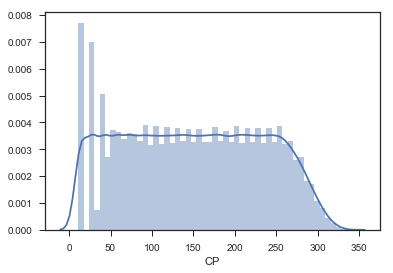

In [14]:
sns.distplot(cp_all, axlabel="CP")

In [15]:
n_evolutions = 75
n_candies = 75 * 12 - 75
print("To make {} evolutions you need {} candies.".format(n_evolutions, n_candies))

To make 75 evolutions you need 825 candies.


In [16]:
min_cp = 10
max_cp = 265

In [33]:
keep = 1
transfer = 1
print('With ananas => keep {} ({} candies), transfer {} ({} candies).'.format(keep,
                                                                                keep*6,
                                                                                transfer,
                                                                                transfer*6+transfer))
ratio = transfer / (keep+transfer)
print("Homogeneous distribution of cps between {} and {} => keep below cp {} else transfer.".format(min_cp, 
                                                                                                 max_cp, 
                                                                                                 round((min_cp+max_cp)*ratio)))

With ananas => keep 1 (6 candies), transfer 1 (7 candies).
Homogeneous distribution of cps between 10 and 265 => keep below cp 138 else transfer.


In [32]:
keep = 1
transfer = 3
print('Without ananas => keep {} ({} candies), transfer {} ({} candies).'.format(keep,
                                                                                keep*3,
                                                                                transfer,
                                                                                transfer*3+transfer))
ratio = transfer / (keep+transfer)
print("Homogeneous distribution of cps between {} and {} => keep below cp {} else transfer.".format(min_cp, 
                                                                                                 max_cp, 
                                                                                                 round((min_cp+max_cp)*ratio)))

Without ananas => keep 1 (3 candies), transfer 3 (12 candies).
Homogeneous distribution of cps between 10 and 265 => keep below cp 206 else transfer.


In [11]:
df = pd.DataFrame()
for i in range(1,21):
    cps = [compute_CP(i) for a in range(10000)]
    df[str(i)] = cps
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,10,14,29,45,53,76,87,105,107,118,...,147,158,194,187,210,254,218,278,253,291
1,10,14,31,44,54,74,89,97,114,129,...,166,186,171,211,222,237,249,255,291,293
2,10,14,29,45,58,73,92,109,111,115,...,152,156,169,209,211,217,236,285,296,259


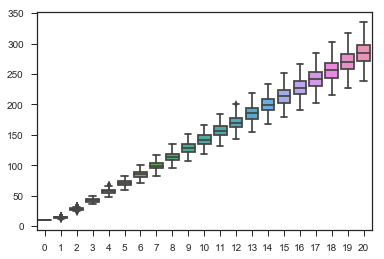

In [12]:
sns.boxplot(data=df)